# 추정과 검정

- 통계적 추론이란 표본의 정보로부터 모집단의 정보를 얻는 것
- 모집단의 특성을 나타내는 상수들을 모수 (Population parameter)
    - 모평균 / 모비율 / 모분산
- 모수를 추정(estimation)하기 위해 표본 통계량을 사용하여 가설검정(Test of hypothesis)
    - 표본평균 / 표본비율 / 표본분산
- 가설 검정
    - 임계값과 검정 통계량을 비교하여 검정 통계량이 채택역에 있으면 귀무가설, 기각역에 있으면 대립가설 채택
    - 유의수준과 유의확률을 비교하여 유의수준보다 유의확률이 크면 귀무가설, 작으면 대립가설을 채택한다.
    - 검정하고자 하는 값이 신뢰구간 내에 있으면 귀무가설, 없으면 대립가설 채택
- 1종 오류
    - 귀무가설이 참인데 대립가설을 채택하는 오류의 확률
    - a(alpha)로 표기하며 유의수준이라고 한다.
    - 표본으로 추정 가능한 정규분포 곡선이 만들어졌을 때, 아무래도 양쪽 꼬리의 범위에 속한다면, 다른 모집단에서 왔을 가능성이 크다.
    - 이 가능성을 토대로, 양 꼬리에 속하면 버리는 것으로 정하며, 이를 전체의 몇 %비율을 버리는 것으로 정하는 것이다.
    - 이 때의 비율을 유의수준이라고 하며, 이 비율이 커지면 귀무가설이 참인데 기각할 확률이 커진다.
- 2종 오류
    - 대립가설이 참인데 귀무가설을 기각하지 않는 오류의 확률
    - b(beta)로 표기하면 1-b를 검정력이라고 한다. 즉, 대립가설이 맞을 때 이를 잡아내는 능력이다.
    - 표본을 통해 추정 가능한 정규분포 곡선을 얻었을 때, 아무래도 양쪽 꼬리에 속한다면, 다른 모집단에서 온 표본일 가능성이 크다.
    - 그래서 양쪽 꼬리의 일정 비율에 속하면 다른 집단에서 온 것이라 보고 이 비율을 정해서 유의수준이라고 한다.
    - 그런데 이 유의수준이 너무 작으면 다른 집단에서 왔음에도 귀무가설을 채택할 확률이 커진다. 
    - 이 오류율를 2종 오류, b라고 하며, 1-b는 다른 집단에서 온 것을 다른 집단으로 온 것으로 판정하는 비율이므로 검정력이라고 한다.
- 중심극한의 정리
    - 표본 평균의 확률분포는 정규분포에 가까워진다.
- 큰 수의 법칙
    - 표본의 개수가 커질수록 표본평균은 모평균에 가까워진다.

# 1-표본

## 모평균의 추정과 검정 (z분포, t분포)

$\alpha$ : 모 평균 </br>
$\sigma$ : 모 표준편차 </br>
$\chi$ : 표본 평균 </br>
S : 표본 표준편차 </br>
n : 표본의 크기 </br>

1) 표본의 크기가 30이상이거나 모집단의 분산을 아는 경우
$\sigma$ 를 가지고 표준화점수를 구해 Z분포에서 검정한다.
2) 표본의 크기가 30미만이고 모집단의 분산을 모르는 경우 (1이 아닌 경우)
S를 가지고 표준화점수를 구해 t분포에서 검정한다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '12'
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['axes.unicode_minus'] = False

In [13]:
import numpy as np
from scipy.stats import norm

x = 31100       # 표본 평균
n = 36          # 표본 크기
sigma = 4500    # 모 표준편차
conf_a = 0.05   # 신뢰수준

# 모분산을 알 때 모평균의 추정
SE = sigma / np.sqrt(n)
conf_z = norm.ppf(1-conf_a / 2) # 양측일 때 유의수준에서의 표준화점수
ME = conf_z * SE    # Margin of Error. 허용오차

print(conf_z)
print('점 추정량 : {:.3f}'.format(x))
print('구간 추정량 : {:.3f} ~ {:.3f}'.format(x-ME, x+ME))

1.959963984540054
점 추정량 : 31100.000
구간 추정량 : 29630.027 ~ 32569.973


In [ ]:
#오차의 한계에 따른 표본규모
#오차의 한계가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우, 표본 규모는 얼마가 되어야 하는가?

## 1종 오류와 2종 오류

# 2 표본

## 분산분석의 가정

### 분산분석의 가정
- 정규성
    - 의미 : 각 표본의 반응변수는 정규분포여야 한다.
    - 방법 : Shapiro(소규모), Anderson-Darling(대규모), 콜모로프 스미르노프, Jarque-Bera, QQ plot 등
- 등분산성
    - 의미 : 각 표본의 반응변수의 분산이 동일해야 한다.
    - 방법 : Barlett 검정(정규성 만족시), Levene 검정(정규성 불만족시)
- 독립성
    - 각 관찰값은 독립적이여야 한다.

## 분산분석 (F분포)

### 분산분석 방법
- 정규성(O), 등분산(O), 샘플크기 동일(O)
    - 분석방법 : standard ANOVA
    - 사후검정 : Dunnett, Tukey HSD, snk, Duncan  --> 이질적인 집단이 있다고 할때 다른 집단을 찾아내는 검정
- 정규성(O), 등분산(O), 샘플크기 동일(X)
    - 분석방법 : standard ANOVA
    - 사후검정 : Fisher's LSD, Scheffe, Dunnett, Tukey HSD, Bonferroni, sidak, Hochberg GT2, Gabrial
- 정규성(), 등분산(X)
    - 분석방법 : Welch's ANOVA, Brown-Forsythe ANOVA
    - 사후검정 : GamesHowell, Dunnett T3, Tamhane T2
### 분산분석 종류
- 일원배치 분산분석
    - 종속변수(1), 독립변수(1)
- 이원배치 분산분석
    - 종속변수(1), 독립변수(2)
- 다중배치 분산분석
    - 종속변수(1), 독립변수(3<=)
- 다변량 분산분석
    - 종속변수(2<=)

## 일원배치 분산분석

#### 분산이 같을 때

- 완전확률화계획법 (Completely randomized design) - 표본 크기가 서로 같다

In [18]:
# 일원배치 분산분석 (등분산 가정)
import pandas as pd
import matplotlib.pyplot as plt

# 각 수준의 모집단이 정규분포를 따르고 분산이 동일하다고 가정한다.
data = pd.DataFrame({"A0":[76,80,78,79,83,74], 
                    'A1':[82,75,83,78,85,80], 
                    'A2':[79,87,88,86,84,82], 
                    'A3':[81,74,76,78,73,70]})

data.std(axis=0, ddof=1)

A0    3.141125
A1    3.619392
A2    3.386247
A3    3.881580
dtype: float64

In [24]:
# 분산분석 - 수기검정
a = 0.05
k = data.shape[0]                           # 표본 크기
level = data.shape[1]                       # 모집단 개수

n = len(data.values.flatten())              # 전체 데이터 수
mu = np.mean(data.values)                   # 전체 데이터 평균

means = np.array(data.mean(axis=0))         # 각 모집단 별 평균
Vs = np.array(data.std(axis=0, ddof=1)**2)  # 각 모집단 별 분산

dfr = level-1                               # 모집단 자유도
dfe = n - dfr-1                             # 오차 자유도

SSTR = (k* (means-mu)**2).sum()             # Sum of Squares of treatment : 각 집단평균의 전체평균 대비의 오차의 합계 (SSB)
SSE = ( (k-1)*Vs).sum()                     # Errors Sum of Squares : 전체 데이터의 집단평균 대비 오차의 합계 (SSW)
SST = ( (data.values-mu)**2).sum()          # Totoal Sum of Squares : 전체 데이터의 전체평균 대비 오차의 합계 
MSR = SSTR/dfr
MSE = SSE/dfe

F  = MSR / MSE
#------------------------------------------------------
# 결국 여기 숨어있는 논리는 이렇다. 집단 내 오차 대비 집단 간 오차를 보겠다는 것이다.
# 집단 내 오차가 큰 상황이라면 집단 간 오차가 커지더라도 어느 정도 이해할 수 있는 면이 있다.
# 하지만 집단 간 오차가 같은 상황일 때 집단 내 오차가 크지 않다면, 집단 간 오차의 의미가 더욱 두드러지는 것이다.
# 그러니 F 값이 커질수록 집단 간 이질성이 크다고 볼 수 있다.
#------------------------------------------------------

print(' SSR: {:.3f}, SSE: {:.3f}, SST: {:.3f}'.format(SSTR, SSE, SST))
print(' MSR: {:.3f}, MSE: {:.3f}, F: {:.3f}'.format(MSR, MSE, F))

from scipy.stats import f

cv = f.ppf(1-a, dfr, dfe)
sp = 1-f.cdf(F, dfr, dfe)

print(' 우측검정 유의값 {:.3f}, F검정통계량 {:.3f}'.format(cv, F))
print(' 유의수준 : {:.3f},  유의확률 {:.3f}'.format(a, sp))


 SSR: 258.125, SSE: 247.500, SST: 505.625
 MSR: 86.042, MSE: 12.375, F: 6.953
 우측검정 유의값 3.098, F검정통계량 6.953
 유의수준 : 0.050,  유의확률 0.002


  stat: 6.953,  p-value: 0.002
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A0     A1   2.1667  0.713   -3.518  7.8513  False
    A0     A2      6.0 0.0363   0.3153 11.6847   True
    A0     A3     -3.0  0.469  -8.6847  2.6847  False
    A1     A2   3.8333 0.2647  -1.8513   9.518  False
    A1     A3  -5.1667 0.0831 -10.8513   0.518  False
    A2     A3     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


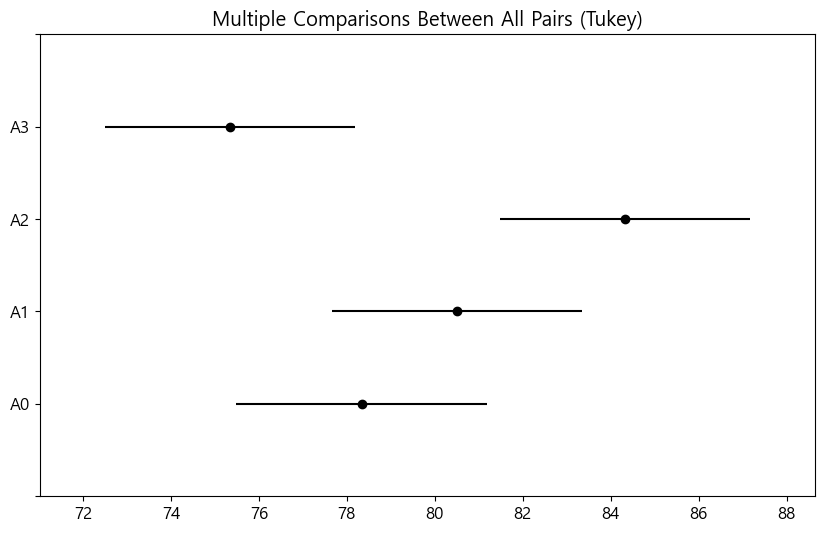

In [ ]:
# 분산분석 - 라이브러리 검정정
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data.melt()['value'], groups=data.melt()['variable'],use_var='equal')
print('  stat: {:.3f},  p-value: {:.3f}'.format(oa.statistic, oa.pvalue))

# 사후검정 (정규성 O, 등분산 O, 샘플크기 동일) ==> Tukey HSD
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data.melt()

mc = MultiComparison(data=org_data['value'], groups=org_data['variable']).tukeyhsd(alpha=0.05)
print(mc)

mc.plot_simultaneous()
plt.show()

# 사후검정 결과, A0-A2, A2-A3 간의 모평균의 차이가 있는 것으로 확인하였다.
# meandiff는 각 그룹 간 모평균 차의 점추정량이고, lower-upper는 모평균 찯의 신뢰구간을 나타낸다.
# p-adj는 조정된 p-value로서 유의수준 0.05보다 적은 경우 reject True로 판명되어 귀무가설을 기각한다.

- 완전확률화계획법 (Completely randomized design) - 표본 크기가 서로 다르다.

In [14]:
data = [[81,75,69,90,72,83],
        [65,80,73,79,81,69],
        [72,67,62,76,80],
        [89,94,79,88]]
data_df = pd.DataFrame(data, index=['A%d' %i for i in range(len(data))]).T
data_1d = sum(data, [])
a = 0.05

dfr = len(data) - 1
dfe = n - 1 - dfr

MSR = 214.544
MSE = 49.355
F = MSR / MSE

from scipy.stats import f

#지금 여기서 구하려고 하는 것은 f통계량의 p-value가 유의 수준을 넘어서는지 확인하는 거야.
#그렇다고 하면 
cv = f.ppf(1-a, dfr, dfe)       # critical value (0.05 확률에서의 임계값)
sp = 1 - f.cdf(F, dfr, dfe)     # significant probability (F통계량 값이 갖는 확률. 이 것이 0..05보다 작아야 함.)

In [18]:
from scipy.stats import f_oneway

oa = f_oneway(*data)    #list형이 아닌 단순 값의 나열로 변환
print('stat:{:.3f}, p-value:{:.3f}'.format(oa.statistic, oa.pvalue))

from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind
org_data = data_df.melt().dropna()

org_data.head(3)

stat:4.347, p-value:0.019


,variable,value
0,A0,81.0
1,A0,75.0
2,A0,69.0


In [20]:
mc = MultiComparison(data = org_data.value, groups=org_data.variable).allpairtest(testfunc=ttest_ind, method='bonf')
print(mc[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
    A0     A1  0.9218 0.3783       1.0  False
    A0     A2  1.5262 0.1613    0.9678  False
    A0     A3 -1.9591 0.0858    0.5146  False
    A1     A2  0.7506 0.4721       1.0  False
    A1     A3 -3.1239 0.0141    0.0849  False
    A2     A3 -3.5486 0.0094    0.0562  False
---------------------------------------------


#### 분산이 다를 때

- 파라미터인 use_var를 다르게 설정
- 'equal':standard anova, 'unequal':Welch anova, 'bf':Brouwn_forsythe

In [25]:
data = pd.DataFrame({'A1':[76,80,78,79,83,74],
                     'A2':[82,75,83,78,85,80],
                     'A3':[79,87,88,86,84,82],
                     'A4':[81,74,76,78,73,70]})

# Welsch의 이분산 일원배치 분산분석석
from statsmodels.stats.oneway import anova_oneway
welch = anova_oneway(data=data.melt().value, groups=data.melt().variable, use_var='unequal')
print('stat : {:.3f}, p-value : {:.3f}'.format(welch.statistic, welch.pvalue))

# 사후검정
from pingouin import pairwise_gameshowell
org_data = data.melt()
gw = pairwise_gameshowell(dv='value', between='variable', data=org_data)
print(gw)

stat : 6.019, p-value : 0.011
    A   B    mean(A)    mean(B)      diff        se         T        df  \
0  A1  A2  78.333333  80.500000 -2.166667  1.956471 -1.107436  9.805651   
1  A1  A3  78.333333  84.333333 -6.000000  1.885618 -3.181981  9.944065   
2  A1  A4  78.333333  75.333333  3.000000  2.038518  1.471657  9.583173   
3  A2  A3  80.500000  84.333333 -3.833333  2.023473 -1.894432  9.955991   
4  A2  A4  80.500000  75.333333  5.166667  2.166667  2.384615  9.951485   
5  A3  A4  84.333333  75.333333  9.000000  2.102908  4.279788  9.819241   

       pval    hedges  
0  0.693488 -0.590196  
1  0.041365 -1.695801  
2  0.488889  0.784303  
3  0.289721 -1.009616  
4  0.143511  1.270854  
5  0.007620  2.280865  


### 이원배치 분산분석

#### 분산이 같을 때 : 모수인자 - 모수인자
- 일원배치 분산분석은 분석대상 모집단을 각각 1:1로 짝을 지어, 하나는 독립변수, 다른 하나는 종속변수로 보고 같은 지를 판단하는 것이다
- 이원배치 분산분석은 독립변수-2 : 종속변수-1일 때의 분석이다. 독립변수 2개 중 어떤 것이 종속변수와 연관성을 갖는지를 분석한다.
- 이 것을 분석하기 위해 독립변수의 각 고유값 별로 종속변수의 평균을 구한 후, 해당 평균들의 분산과 전체 분산의 비로서 차이를 보는 것이다.
- 종속변수의 전체 분산 대비했을 때 독립변수-고유값 별 종속변수 분산이 더 크다면, 해당 독립변수-고유값 별 종속변수 평균은 서로 이질적으로 본다.
- 즉, 독립변수가 종속변수에 영향을 주고 있음을 의미한다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['axes.unicode_minus'] = False

from pandas import DataFrame, crosstab


데이터확인

교호작용 확인 
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]


            df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN


In [ ]:
# -----------------------------------------------------
# 반복이 있는 이원배치 분산분석
# -----------------------------------------------------
## A, B 모두 모수인자

data = pd.DataFrame({   "A":[1,2,3,1,2,3,1,2,3,1,2,3],
                        "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                        "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})
print('\n데이터확인')
#print(data)
print('\n교호작용 확인 \n', crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list))

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y~C(A)+C(B)", data = data).fit()
atable2 = anova_lm(model)
print('\n\n',atable2)

#A 그룹 간의 차이는 없고, B그룹 간의 차이가 있는 것으로 나타났다.

In [ ]:
# -----------------------------------------------------
# 반복이 있는 이원배치 분산분석
# -----------------------------------------------------
## A, B 모두 모수인자

from pandas import DataFrame, crosstab
data = DataFrame(
    {"A":[1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3, 1,1,1,2,2,2,3,3,3],#열수준
     "B":[1,1,1,1,1,1,1,1,1, 2,2,2,2,2,2,2,2,2, 3,3,3,3,3,3,3,3,3, 4,4,4,4,4,4,4,4,4],#행수준
     "Y":[64,66,70,72,81,64,74,51,65, 65,63,58,57,43,52,47,58,67, 59,68,65,66,71,59,58,45,42, 58,50,49,57,61,53,53,59,38]})

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Y~C(A)+C(B)+C(A):C(B)", data=data).fit()
atable3 = anova_lm(model)
print(atable3)

# 아래 결과에 의해 A:B의 교호작용 효과는 유의하지 않은 것으로 드러났다. 따라서 A, B 중 주효과를 확인할 필요가 있다.

             df       sum_sq     mean_sq         F    PR(>F)
C(A)        2.0   342.388889  171.194444  3.081500  0.064393
C(B)        3.0  1002.888889  334.296296  6.017333  0.003307
C(A):C(B)   6.0   588.944444   98.157407  1.766833  0.148795
Residual   24.0  1333.333333   55.555556       NaN       NaN


In [ ]:
model = ols('Y~C(A)+C(B)', data=data).fit()
atable4 = anova_lm(model)
print(atable4)

# A, B만으로 분산분석 시 B의 경우 주효과를 갖는 것으로 확인함.

            df       sum_sq     mean_sq         F    PR(>F)
C(A)       2.0   342.388889  171.194444  2.671744  0.085542
C(B)       3.0  1002.888889  334.296296  5.217190  0.005102
Residual  30.0  1922.277778   64.075926       NaN       NaN


#### 분산이 같을 때 : 모수인자 - 변량인자

In [13]:
# -----------------------------------------------------
# 반복이 없는 이원배치 분산분석 : 난괴법 혹은 확률화블럭계획법(RBD, randomized block design)
# -----------------------------------------------------

## A가 모수인자, B가 변량인자
# '반복이 없는 이원배치 분산분석'과 동일한 방법으로 진행한다.

from pandas import DataFrame, crosstab
data = DataFrame({"A":[1,2,3,1,2,3,1,2,3,1,2,3],
                 "B":[1,1,1,2,2,2,3,3,3,4,4,4],
                 "Y": [4,3,5,5,7,6,7,8,9,8,10,12]})

#반복여부 확인
print('데이터 확인 \n', crosstab(data['A'], data['B'], values=data['Y'], aggfunc=list))

데이터 확인 
 B    1    2    3     4
A                     
1  [4]  [5]  [7]   [8]
2  [3]  [7]  [8]  [10]
3  [5]  [6]  [9]  [12]


In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('Y~C(A)+C(B)', data=data).fit()
atable2 = anova_lm(model)
print(atable2)

           df  sum_sq  mean_sq     F    PR(>F)
C(A)      2.0     8.0      4.0   4.0  0.078717
C(B)      3.0    60.0     20.0  20.0  0.001586
Residual  6.0     6.0      1.0   NaN       NaN


# 연습문제

### 문제 1
- 1.1 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.
- 1.2 모표준편차가 3이라는 것을 알고 있을 때, 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오
- [10,19,15,11,13,14,18]

In [30]:
# --------------------------------------------------------------------------------
# 1.1 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.
# --------------------------------------------------------------------------------
from scipy.stats import t

data = [10,19,15,11,13,14,18]
X = np.mean(data)
s = np.std(data, ddof=1)
a = 0.05
n = len(data)
df = n-1
SE = s / np.sqrt(n)
min = X - t.ppf(1-a/2, df=df)*SE  #그러니까 여기서 구허고 싶은 것은 z값이야. z인데 상위 2.5% 위치의 z값을 알고 싶은 거야.
max = X + t.ppf(1-a/2, df=df)*SE

print('1.1. 모평균의 95% 신뢰수준에서의 신뢰구간 : {:.3f} ~ {:.3f}'.format(min, max))

# ppf와 cdf는 역함수 관계다. 
# cdf가 z값을 주면, 표준정규분포 상 해당 위치까지는 누적확률을 반환하고,
# ppf는 누적확률을 주면 해당 위치의 z값을 반환한다.
# 이 구간추정 문제에서 원하는 z(0.025)는 상위 2.5% 위치의 z값이다. 
# 따라서 ppf 함수를 사용할 때 ppf(0.975)와 같은 형태로 주어야 한다.

1.1. 모평균의 95% 신뢰수준에서의 신뢰구간 : 11.185 ~ 17.386


In [31]:
# --------------------------------------------------------------------------------
# 1.2 모표준편차가 3이라는 것을 알고 있을 때, 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오
# --------------------------------------------------------------------------------
# 모표준편차를 알고 있으므로 표본표준편차를 사용하지 않는다.
from scipy.stats import norm
sig = 3
SE = sig / np.sqrt(n)
min = X - norm.ppf(1-a/2)*SE  #그러니까 여기서 구허고 싶은 것은 z값이야. z인데 상위 2.5% 위치의 z값을 알고 싶은 거야.
max = X + norm.ppf(1-a/2)*SE

print('1.1. 모평균의 95% 신뢰수준에서의 신뢰구간 : {:.3f} ~ {:.3f}'.format(min, max))

1.1. 모평균의 95% 신뢰수준에서의 신뢰구간 : 12.063 ~ 16.508


### 문제 2
- 어느 제조회사 불량률이 5%다. 95% 신뢰수준에서 오차의 한계가 3%가 되도록 최소 표본 사이즈를 구하시오.

In [35]:
# 이문제는 모비율의 추정이다. 모비율의 추정에서 SE = np.sqrt(p(1-p) / n)이 된다. ME를 0.03으로 만드는 n을 구한다.
ratio = 0.03
p = 0.05
a = 0.05
z = norm.ppf(1-a/2)
ME = z*SE

n = z**2 * p*(1-p) / ratio**2

print(n)

202.74365998107885


### 문제 3
- 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오.

In [ ]:
from scipy.stats import chi2

n=30
v = 50
df = n-1
a = 0.05

min = (n-1)*v / chi2.ppf(a/2, df=df)
max = (n-1)*v / chi2.ppf(1-a/2, df=df)

print('모분산의 구간 추정 : {:.3f} ~ {:.3f}'.format(min, max))

모분산의 구간 추정 : 90.359 ~ 31.713


### 문제 4
- 20번 뽑았더니 5개 성공. 성공률 p라고 하면 모비율 p에 대한 95% 신뢰구간을 구하시오

In [44]:
p = 5/20
n = 20
a = 0.05

min = p - norm.ppf(1-a/2) * np.sqrt(p*(1-p)/n)
max = p + norm.ppf(1-a/2) * np.sqrt(p*(1-p)/n)

print('모비율의 구간 추정 : {:.3f} ~ {:.3f}'.format(min, max))

모비율의 구간 추정 : 0.060 ~ 0.440


### 문제 5
- A국 남성 흡연율 35%로 발표. B국 450명 표본에서 180명 흡연자. 유의수준 0.05에서 귀무가설, 대립가설 세워 평균 검정